# Quick Robin! To the Battmobile!

### Example notebook to demonstrate package capabilities

### Unpack and sorting battery data

Here we will import our package 'alfred'.

In [1]:
import sys
sys.path[0] = "../"
import alfred

In order for alfred to access the zipfile containing the raw bus battery csv files, the zipfile must be organized within a directory. 

We recommend storing this in an accessible data folder. We have provided such a directory called "example_data" and with in it contains a zipfile named "KCM-Raw-Data.zip".

Next, run the function unpack_interactive and watch alfred open, parse, and sort the data. 
This will unzip the files, sort all the files from the same bus into a unique bus folder, and then seperate the folders based on the numbers of files each bus contains. 

This should take about 2-3 minutes.

In [4]:
%%time
alfred.unpack_interactive()

Enter the name of the raw data folder:  example_data
Enter the name of the zip file (include .zip):  KCM-Raw-Data.zip


CPU times: user 2min 14s, sys: 1.89 s, total: 2min 16s
Wall time: 2min 39s


You should now see 3 new folders. 

**sorted_data** contains buses with only 1 or 2 files (1 or 2 maintenance visit).

 - This folder will also include an incomplete folder for csv files that do not fit the same confirguration as the majority of the csv files.  

**vis_buses** contains buses with 3 or more files (3 or more maintenance visits),
 - These buses will have a more extensive maintenance history and may prove the most useful

**all_buses** contain a concatenated list of all the bus folder from vis_buses and sorted_data.

## Building dataframes from the csv files

Directly reading the csv files into a dataframe formats the data in an impractical way:

In [5]:
import pandas as pd

examp_file = alfred.find_directory() + 'vis_buses/' + 'bus_0039142903b40233500710/' + '14H0221_ProfileData_20171005100537.csv'
df = pd.read_csv(examp_file)

df

,,.1,Unnamed: 2,.2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,ESS BMS and Battery Module Profile Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data retrieved: 10/05/2017 @ 10:06:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BMS Software AS version:,0x0206BA42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,<Module Voltages (V)>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,NaN,< 24.0,24,26.4,28.8,31.2,33.6,36,38.4,40.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check out how many buses are in each folder:

In [27]:
import os

sorted_directory = alfred.find_directory() + 'sorted_data'
vis_directory = alfred.find_directory() + 'vis_buses'
all_directory = alfred.find_directory() + 'all_buses'

# Iterate over each directory and print the number of folders
for directory, name in zip([sorted_directory, vis_directory, all_directory],
                           ['sorted_data', 'vis_buses', 'all_buses']):
    items = os.listdir(directory)
    # Filter out only the directories
    folders = [item for item in items if os.path.isdir(os.path.join(directory, item))]
    num_folders = len(folders) #counts folders
    print(f"Number of folders in {name}: {num_folders}")

Number of folders in sorted_data: 113
Number of folders in vis_buses: 66
Number of folders in all_buses: 176


Note that **all_buses** has 3 (or 1 if on MAC) less folders than **vis_buses** + **sorted_data**. This is because sorted_data includes an incomplete flie (and if on run Windows, a __MACOSX and KCM-Raw-Data folder)

Our data building functions allow the csvs to be parsed into meaningful dataframes for statistical analysis and visualizations.

***sort_bus_by_date*** creates a dataframe that orders the file names for a given bus by date retrieved.

In [7]:
directory = alfred.find_directory() + 'vis_buses/'
df_bus_dates = alfred.sort_bus_by_date(directory, 'bus_0039142903b40233500710/')
df_bus_dates

,Filename,DateRetrieved
0,14H0221_ProfileData_20171005100537.csv,2017-10-05 10:06:42
1,14H0221_ProfileData_20171027081821.csv,2017-10-27 08:19:08
2,14H0221_ProfileData_20180403084955.csv,2018-04-03 08:50:47


***build_bus_df*** takes as input a directory, a string of the desired bus directory, and a keyword (selected from 'Current', 'Voltage', or 'Power'). The function returns a dataframe of the entire bus current, voltage, or power over time, with the order of the rows being sequential by date.

In [8]:
alfred.build_bus_df(directory, 'bus_0039142903b40233500710/', 'Voltage')

,< 450.0,450,460,470,480,490,500,510,520,530,...,670,680,690,700,710,720,730,740,>= 750.0,TOTAL
0,0,0,0,0,0,0,2,0,33,439,...,301690,194716,106311,18151,1063,4,0,0,0,11730296
1,27,0,0,0,0,0,2,0,33,440,...,305173,196624,107354,18399,1099,5,0,1,7,11912854
2,27,0,0,0,0,0,2,0,70,646,...,460645,297335,153481,23650,1385,5,0,1,7,17233181


***build_module_df*** function takes as input a directory, a string of the desired bus directory, and an integer module number (can be between 1 and 16). 
The function returns a dataframe of the module voltages with the rows sequential in time. 

Note that the module data within the csv files is further subdivided into 12 submodules. Therefore, this function will output 12 rows for each date retrieved within the bus folder. For example, running this function on bus 1 module 1 should return a dataframe with 216 rows. Rows 0-11 correspond to the first date in the bus folder, then rows 12-24 to the next date, etc.

In [10]:
alfred.build_module_df(directory, 'bus_0039142903b40233500710/', 1)

,< 2.0,2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,>= 4.0,TOTAL
0,0,0,0,0,22,51640,1409252,9188232,1370420,63883,0,0,12083449
1,0,0,0,0,1,17266,1334515,9420902,1292097,18668,0,0,12083449
2,0,0,0,0,40,112583,1446459,9003449,1388097,132821,0,0,12083449
3,0,0,0,0,0,19245,1346449,9399253,1298527,19975,0,0,12083449
4,0,0,0,0,30,120869,1449816,8982920,1387964,141850,0,0,12083449
5,0,0,0,0,0,19927,1349574,9391196,1301885,20867,0,0,12083449
6,0,0,0,0,34,112910,1447238,9004137,1387148,131982,0,0,12083449
7,0,0,0,0,0,15095,1325804,9444233,1283477,14840,0,0,12083449
8,0,0,0,0,36,109092,1444061,9015738,1387096,127426,0,0,12083449
9,0,0,0,0,1,17936,1340878,9414450,1292609,17575,0,0,12083449


***build_module_df*** is similar to the above function, but it averages the submodule data together to return only one row for each date for the module specified. This allows for easier visualization of voltages on the module level.

In [11]:
alfred.build_module_average_df(directory, 'bus_0039142903b40233500710/', 1)

,< 2.0,2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,>= 4.0,TOTAL
DateRetrieved,,,,,,,,,,,,,
2017-10-05 10:06:42,0.0,0.0,0.0,0.0,15.833333,57949.666667,1.390586e+06,9.227502e+06,1.340632e+06,66763.166667,0.000000,0.0,12083449.0
2017-10-27 08:19:08,0.0,0.0,0.0,0.0,15.833333,58497.083333,1.405959e+06,9.368759e+06,1.356933e+06,67734.333333,0.000000,0.0,12257898.0
2018-04-03 08:50:47,0.0,0.0,0.0,0.0,294.666667,103232.250000,2.064658e+06,1.316086e+07,1.972075e+06,118852.750000,0.916667,0.0,17419973.0


***count_mod_changes*** function takes as an input a directory of data sorted by bus. The function will then return a dataframe showing the bus and module number as well as the number of times the module has been changed.

In [12]:
alfred.count_mod_changes(directory)

,Bus,Module,Date,Change
0,611,1,"06/27/2017, 06:08:55",0
1,611,1,"09/25/2017, 10:33:08",1
2,611,1,"01/02/2018, 09:54:46",1
3,611,1,"05/11/2018, 06:24:14",1
4,611,2,"06/27/2017, 06:08:55",0
...,...,...,...,...
75,710,16,"07/24/2017, 08:36:43",0
76,710,16,"10/09/2017, 10:36:59",0
77,710,16,"01/19/2018, 08:53:57",0
78,710,16,"06/07/2018, 10:34:06",0


***find_replaced_modules*** takes as an input a directory of data sorted by bus. The function will return a dictionary with the bus number as the key and the serial number of the modules that have full lifetime data as the values.

In [13]:
alfred.find_replaced_modules(directory)

{'bus_003916320u840233500710': [' 0039-1608-0RJ-402335-00710......',
  ' 0039-1632-0UG-402335-00710.. ...',
  ' 0039-1632-0UK-402335-00710.. ...',
  ' 0039-0951-0HL-402335-00108..&...',
  ' 0039-1632-0UE-402335-00710.. ...',
  ' 0039-1632-0UH-402335-00710.. ...',
  ' 364A1585G3REVA-14A3925..........',
  ' 0039-1632-0U8-402335-00710.. ...',
  ' 364A1585G3REVA-14A3924..........',
  ' 0039-1632-0UL-402335-00710.. ...',
  ' 0039-1522-04F-402335-00710......',
  ' 0039-0951-0DM-402335-00108..&...',
  ' 0039-1632-0UN-402335-00710.. ...',
  ' 0039-0951-0DP-402335-00108..&...',
  ' 0039-1632-0UP-402335-00710.. ...',
  ' 0039-1632-0UC-402335-00710.. ...',
  ' 13E0010.........................',
  ' 364A1585G3REVA-14A3920..........',
  ' 0039-0951-0HB-402335-00108..&...'],
 'bus_0a12131006540233500610': [' 0039-1638-0HC-402335-00802..&...'],
 'bus_003916240vn40233500710': [' 364A1585G3REVC-14M3961..........',
  ' 364A1585G3REVC-14M3958..........',
  ' 364A1585G3REVC-14M3957..........',
  ' 364A158

***swapped_module_data*** frames function takes as an input a directory, a module serial number, and a keyword. The function then returns a dataframe of the input module characteristic. For example, inputting your directory with the serial number for bus 1 module 1 and the keyword 'balancers' will return a dataframe of the cell balancer data for that module, with the rows sequential by time.

In [14]:
alfred.swapped_mod_dataframes(directory, ' 0039-1811-00U-402335-00804......', 'balancers')

[                                            Off      On    TOTAL
 <Cell Balancers>  09/20/2018, 06:30:57                          
 CELL 1                                  1030246  106943  1137189
 CELL 2                                  1028063  109126  1137189
 CELL 3                                  1029071  108118  1137189
 CELL 4                                  1027367  109822  1137189
 CELL 5                                  1028041  109148  1137189
 CELL 6                                  1026996  110193  1137189
 CELL 7                                  1028023  109166  1137189
 CELL 8                                  1025681  111508  1137189
 CELL 9                                  1026528  110661  1137189
 CELL 10                                 1023558  113631  1137189
 CELL 11                                 1022981  114208  1137189
 CELL 12                                 1025729  111460  1137189,
                                             Off      On    TOTAL
 <Cell Ba

## Visualizing the parsed data:

Our visualization functions take the parsed data from our data building functions to help visualize trends in swapped modules.

***visualize_mod_changes*** uses the count_mod_changes output to produce a heat map for all buses indicating when the modules have been changed (with a color change indicating the module has been changed). The heat map includes a drop down menu to select the desired bus.

In [15]:
alfred.visualise_mod_changes(directory)

alt.Chart(...)

***mod_change_statistics*** returns the average times changed per module across all buses represented in our dataset.

<Axes: xlabel='Module', ylabel='Average times changed'>

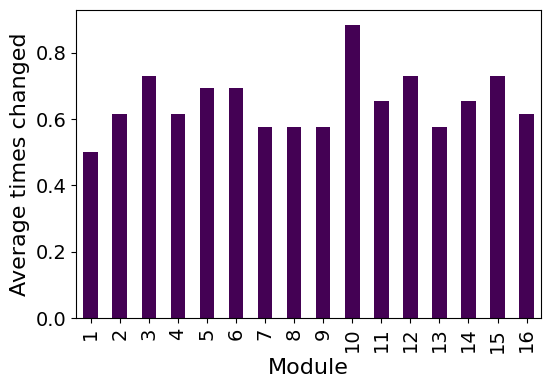

In [16]:
alfred.mod_change_statistics(directory)

***visualize_mod_time*** uses the build_module_average_df output to visualize the distribution of time spent at each voltage in the voltage range for a given module. For example, running this function with the input of bus 1 and module 1 will return a graph with 12 plotted lines, one for each individual date in bus one, where the x axis is voltage and the y axis is time in seconds. A dropdown menu is available on the graph to select a specific date. The selected date will remain in color while the other dates will be rendered gray. The axes are also scalable by clicking and dragging and using your mouse scroll.

In [21]:
alfred.visualize_mod_time(directory, 'bus_0039142903b40233500710/', 1)

alt.Chart(...)